# Fama and French Factor Model: Understanding the Factors #

In [12]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt

# Handle Files
import sys
import os

# Import Local Functions
sys.path.append(os.path.abspath("../source"))
from config import get_tickers
from data_downloader import get_market_data
from portfolios_toolkit import calculate_analytics

### Value Factor ###

In [13]:
# "VTV",  # LargeCap Value
# "VOE",  # MidCap Value
# "VBR",  # Small Cap Value
# "VV",   # LargeCap Blend
# "VO",   # MidCap Blend
# "VB",   # SmallCap Blend
# "VUG",  # LargeCap Growth
# "VOT",  # MidCap Blend
# "VBK"   # SmallCap Blend

# ":)"

In [14]:
tickers = get_tickers(mod="5.2")

tickers

['VTV', 'VOE', 'VBR', 'VV', 'VO', 'VB', 'VUG', 'VOT', 'VBK']

In [15]:
# Import data
df_returns = pd.DataFrame()

for ticker in tickers:
    df = get_market_data(
        ticker=ticker, 
        start_date='2015-01-01', 
        end_date='2025-01-01', 
        returns=True
    )
    
    returns = df['returns'].rename(ticker)
    
    df_returns = pd.concat([df_returns, returns], axis=1)

In [16]:
df_returns

,VTV,VOE,VBR,VV,VO,VB,VUG,VOT,VBK
2015-01-05 00:00:00,-0.018632,-0.017370,-0.017610,-0.017327,-0.017798,-0.015514,-0.017612,-0.016677,-0.013220
2015-01-06 00:00:00,-0.008840,-0.010408,-0.014295,-0.009757,-0.010933,-0.012834,-0.009515,-0.011983,-0.014133
2015-01-07 00:00:00,0.011127,0.011204,0.009941,0.011267,0.012661,0.011961,0.012440,0.012784,0.015986
2015-01-08 00:00:00,0.018235,0.016686,0.016160,0.018676,0.017767,0.015785,0.017465,0.019807,0.016131
2015-01-09 00:00:00,-0.009136,-0.007857,-0.009973,-0.008388,-0.007216,-0.008469,-0.007489,-0.006493,-0.006118
...,...,...,...,...,...,...,...,...,...
2024-12-24 00:00:00,0.008324,0.007730,0.007419,0.011002,0.008548,0.008316,0.013392,0.010388,0.009873
2024-12-26 00:00:00,0.002216,0.001588,0.003838,0.000289,0.000186,0.004336,-0.001550,-0.001685,0.005300
2024-12-27 00:00:00,-0.005900,-0.006858,-0.009900,-0.010743,-0.008583,-0.011619,-0.014438,-0.011956,-0.014891
2024-12-30 00:00:00,-0.010188,-0.008515,-0.006958,-0.012041,-0.009982,-0.008544,-0.012643,-0.010335,-0.009969


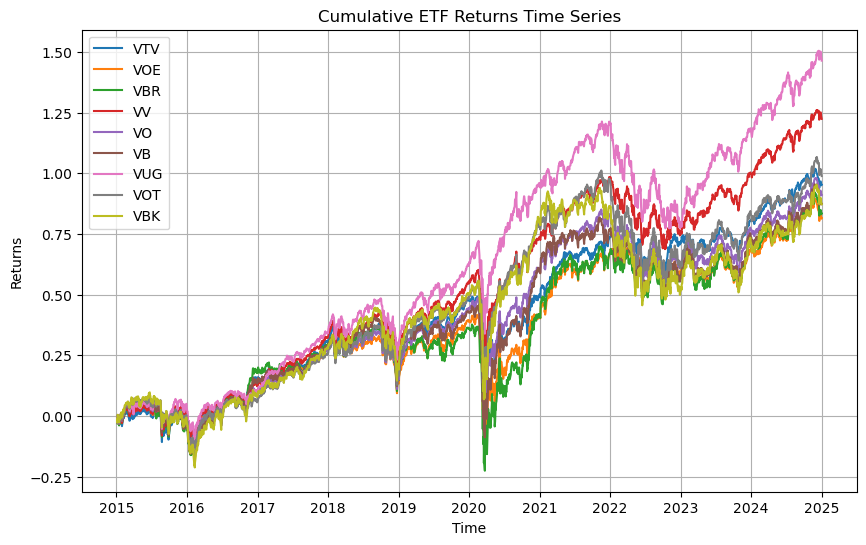

In [17]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(df_returns.cumsum(), label=df_returns.columns, alpha=1)

# Config
plt.title('Cumulative ETF Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show()

In [18]:
# Analytics Table
value_analytics_table = calculate_analytics(df_returns)

value_analytics_table.sort_values(by = 'Sharpe Ratio', ascending = False)

,Annualized Returns,Annualized Volatility,Sharpe Ratio,Max Drawdown,VaR 95%
VUG,0.146706,0.207749,0.706171,-0.004398,-0.020792
VV,0.122663,0.179747,0.682421,-0.004192,-0.016968
VTV,0.095442,0.168959,0.564885,-0.004579,-0.015811
VOT,0.099060,0.205835,0.481261,-0.004645,-0.020464
VO,0.091120,0.190089,0.479354,-0.004995,-0.017998
VOE,0.081673,0.189576,0.430820,-0.005641,-0.017545
VB,0.087497,0.210248,0.416163,-0.005444,-0.019925
VBK,0.087394,0.222166,0.393371,-0.004886,-0.022559
VBR,0.083610,0.214819,0.389214,-0.006015,-0.019860


This is not very informative. But we can approximate the Fama and French Premiums using the Value ETFS

In [19]:
# Value DataFrame
value_df = pd.DataFrame(index = df_returns.index)
value_df['value'] = df_returns[['VTV', 'VOE', 'VBR']].mean(axis=1)
value_df['blend'] = df_returns[['VV', 'VO', 'VB']].mean(axis=1)
value_df['growth'] = df_returns[['VUG', 'VOT', 'VBK']].mean(axis=1)

value_df

,value,blend,growth
2015-01-05 00:00:00,-0.017870,-0.016880,-0.015836
2015-01-06 00:00:00,-0.011181,-0.011175,-0.011877
2015-01-07 00:00:00,0.010757,0.011963,0.013737
2015-01-08 00:00:00,0.017027,0.017410,0.017801
2015-01-09 00:00:00,-0.008989,-0.008024,-0.006700
...,...,...,...
2024-12-24 00:00:00,0.007825,0.009288,0.011218
2024-12-26 00:00:00,0.002547,0.001604,0.000688
2024-12-27 00:00:00,-0.007553,-0.010315,-0.013762
2024-12-30 00:00:00,-0.008554,-0.010189,-0.010982


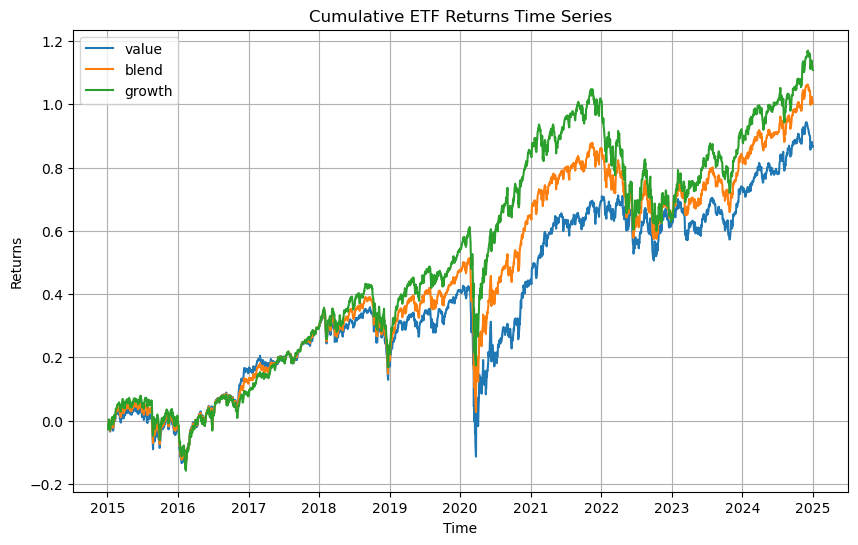

In [20]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(value_df.cumsum(), label=value_df.columns, alpha=1)

# Config
plt.title('Cumulative ETF Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show()

In [21]:
# Annualized Returns
value_annualized_returns = value_df.mean() * 252 * 100
value_annualized_returns.name = 'annualized_returns'

value_annualized_returns

value      8.690864
blend     10.042684
growth    11.105341
Name: annualized_returns, dtype: float64

In [22]:
# Annualized Volatility
value_annualized_volatility = value_df.std() * np.sqrt(252) * 10
value_annualized_volatility.name = 'annualized_volatility'

value_annualized_volatility

value     1.877838
blend     1.896949
growth    2.068743
Name: annualized_volatility, dtype: float64

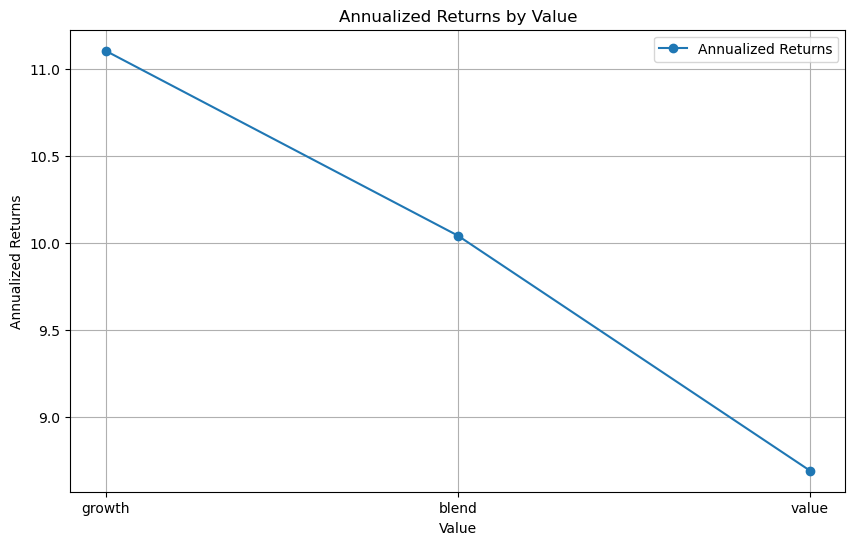

In [23]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(value_annualized_returns.iloc[::-1], label='Annualized Returns', alpha=1, marker='o')

# Config
plt.title('Annualized Returns by Value')
plt.xlabel('Value')
plt.ylabel('Annualized Returns')
plt.legend()
plt.grid()

# Show
plt.show()

In [24]:
# Calculate the approximation of the HML prime
HML = 1/2*(df_returns['VTV'] + df_returns['VBR']) - 1/2*(df_returns['VUG'] + df_returns['VBK'])

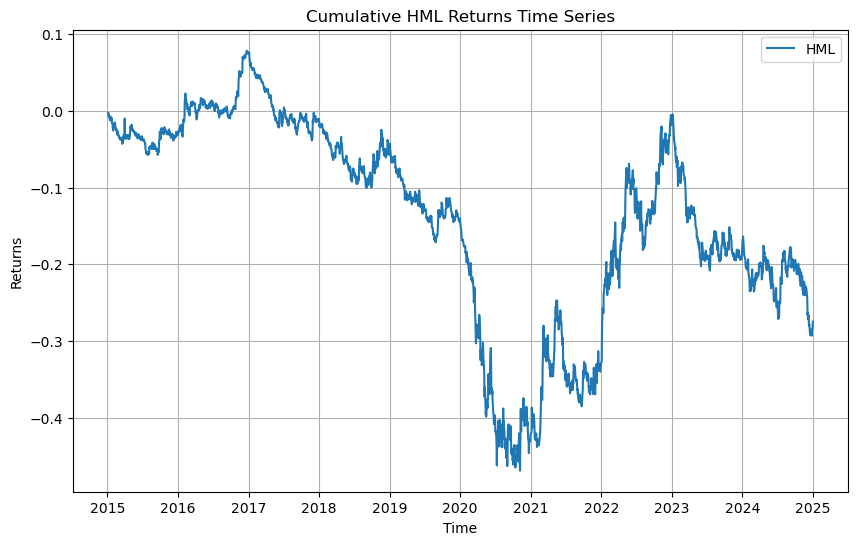

In [25]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(HML.cumsum(), label='HML', alpha=1)

# Config
plt.title('Cumulative HML Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show()

In [26]:
# We can download the premiums in the Fama and French website
premiums_df = pd.read_csv(r'..\additional_data\famafrench_premiums.csv')
premiums_df.set_index('Date', inplace=True)
premiums_df.index = pd.to_datetime(premiums_df.index)
premiums_df.columns = ['mkt_premium', 'smb_premium', 'hml_premium', 'risk_free_rate']
premiums_df = premiums_df.div(100)

premiums_df

,mkt_premium,smb_premium,hml_premium,risk_free_rate
Date,,,,
2015-01-02,-0.0012,-0.0059,0.0012,0.00000
2015-01-05,-0.0184,0.0033,-0.0068,0.00000
2015-01-06,-0.0103,-0.0080,-0.0029,0.00000
2015-01-07,0.0119,0.0020,-0.0067,0.00000
2015-01-08,0.0181,-0.0012,-0.0029,0.00000
...,...,...,...,...
2025-03-25,0.0012,-0.0094,0.0005,0.00016
2025-03-26,-0.0122,-0.0048,0.0152,0.00016
2025-03-27,-0.0042,0.0019,0.0030,0.00016


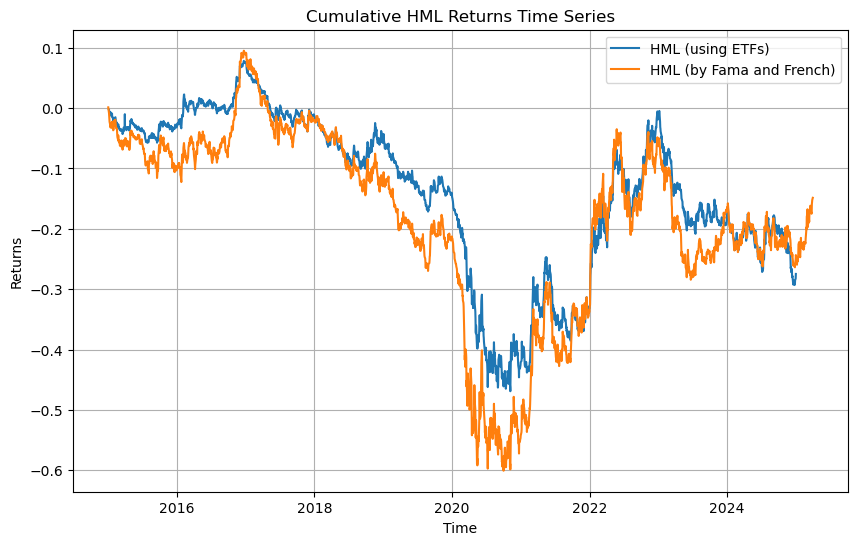

In [30]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(HML.cumsum(), label='HML (using ETFs)', alpha=1)
plt.plot(premiums_df['hml_premium'].cumsum(), label='HML (by Fama and French)', alpha=1)

# Config
plt.title('Cumulative HML Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show()